In [1]:
#We see about two things of Time Series Data:-

#1.Decompose:- How to decompose Time Series Data
#(Finding Additive and Multiplicative parts of Time Series Data)

#2.Stationary:- How to do the stationarity to check the Time Series Data
#(To check the Mean and Variance are constant over the time)

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd

In [2]:
#Definition of Additive Time Series:-
#Value = Base Level + Trend + Seasonality + Error

#Definition of Multiplicative Time Series:-
#Value = Base Level * Trend * Seasonality * Error

In [3]:
#Import the dataset - Australian Drug Sales

DrugSalesData = pd.read_csv("E:/datafiles/TimeSeries.csv", parse_dates = ['Date'], index_col = 'Date')

In [4]:
DrugSalesData.head(10)

,Value
Date,
1991-01-07,3.526591
1991-01-08,3.180891
1991-01-09,3.252221
1991-01-10,3.611003
1991-01-11,3.565869
1991-01-12,4.306371
1992-01-01,5.088335
1992-01-02,2.814520
1992-01-03,2.985811


In [5]:
#Deleting the index column

DrugSalesData.reset_index(inplace = True)

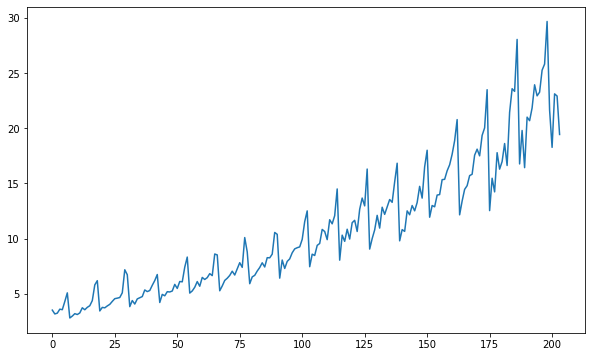

In [6]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(DrugSalesData['Value'])

In [7]:
#Multiplicative Decomposition
mul_result = seasonal_decompose(DrugSalesData['Value'], model = 'multiplicative', period = 1)

#Additive Decomposition
add_result = seasonal_decompose(DrugSalesData['Value'], model = 'additive', period = 1)


Text(0.5, 0.98, '\nMultiplicative Decompose')

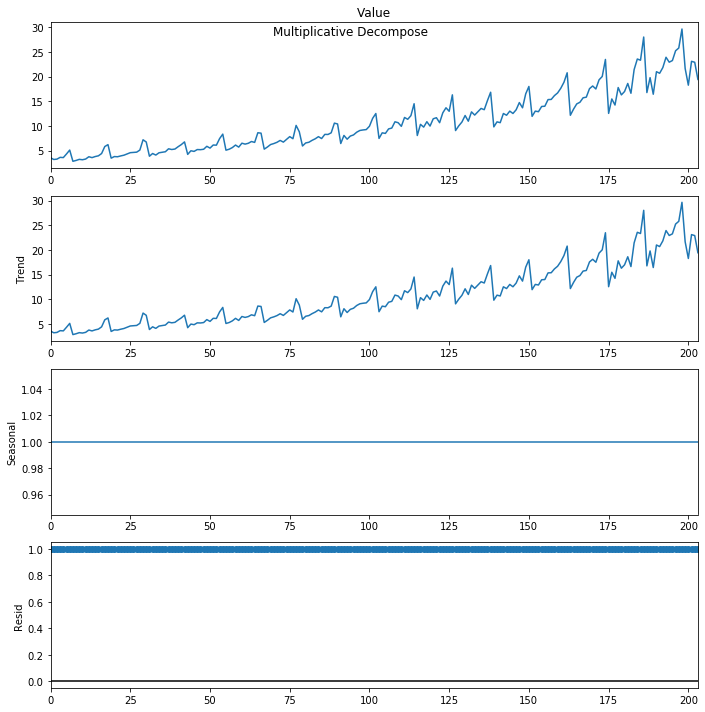

In [8]:
#plot

plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize = 12)

Text(0.5, 0.98, '\nAdditive Decompose')

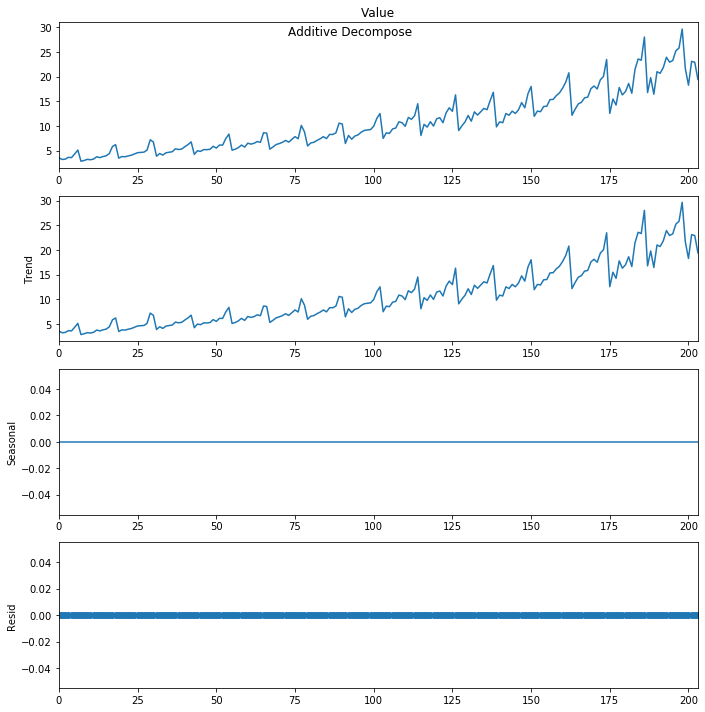

In [9]:
add_result.plot().suptitle('\nAdditive Decompose', fontsize = 12)

In [10]:
#Now we are going to see the values of Trend Component and Seasonal Component

#Additive

new_df_add = pd.concat([add_result.seasonal,add_result.trend,add_result.resid,add_result.observed], axis=1)
new_df_add.columns = ['seasonality', 'trend', 'residual', 'actual_values']
new_df_add.head()

,seasonality,trend,residual,actual_values
0,0.0,3.526591,0.0,3.526591
1,0.0,3.180891,0.0,3.180891
2,0.0,3.252221,0.0,3.252221
3,0.0,3.611003,0.0,3.611003
4,0.0,3.565869,0.0,3.565869


In [11]:
#Now we are going to see the values of Trend Component and Seasonal Component

#Multiplicative

new_df_mul = pd.concat([mul_result.seasonal,mul_result.trend,mul_result.resid,mul_result.observed], axis=1)
new_df_mul.columns = ['seasonality', 'trend', 'residual', 'actual_values']
new_df_mul.head()

,seasonality,trend,residual,actual_values
0,1.0,3.526591,1.0,3.526591
1,1.0,3.180891,1.0,3.180891
2,1.0,3.252221,1.0,3.252221
3,1.0,3.611003,1.0,3.611003
4,1.0,3.565869,1.0,3.565869


In [12]:
#ADFULLER TEST FOR STATIONARITY

#Definition of Stationarity - Constant mean and constant variance

#ADF Test - null hypothesis - non stationary - if p-value < 5% reject null hypothesis

from statsmodels.tsa.stattools import adfuller

adfuller_result = adfuller(DrugSalesData.Value.values, autolag = 'AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print("Critical Values:")
    print(f'     {key}, {value}')

ADF Statistic: 3.145185689306736
p-value: 1.0
Critical Values:
     1%, -3.465620397124192
Critical Values:
     5%, -2.8770397560752436
Critical Values:
     10%, -2.5750324547306476
